In [20]:
import requests
from bs4 import BeautifulSoup

In [21]:
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [22]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [29]:
data = []
data_iter = iter(soup.find_all('td'))

while True:
    try:
        country = next(data_iter).text
        confirmed = next(data_iter).text
        deaths = next(data_iter).text
        continent = next(data_iter).text

        data.append((
            country, 
            confirmed.replace(', ', ''), 
            deaths.replace(', ', ''), 
            continent
            ))

    except StopIteration:
        break

data.sort(key = lambda row: row[1], reverse = True)


In [30]:
# now print the table in a more human readable format
import texttable as tt
table = tt.Texttable()

In [31]:
table.add_rows([(None, None, None, None)] + data)
table.set_cols_align(('c', 'c', 'c', 'c'))
table.header((' Country ', ' Number of Cases ', ' Deaths ', ' Continent '))
print(table.draw())

+---------------------------+-------------------+----------+-------------------+
|          Country          |  Number of Cases  |  Deaths  |     Continent     |
+===========================+===================+==========+===================+
|           China           |      99,142       |  4,636   |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|          Jordan           |      975,956      |  11,761  |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|        Kazakhstan         |      975,150      |  12,769  |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|          Greece           |      966,221      |  18,595  |      Europe       |
+---------------------------+-------------------+----------+-------------------+
|           Cuba            |      963,090      |  8,309   |   North America   |
+---------------------------

In [32]:
# turn this table into a csv file
import csv
import pandas as pd

df = pd.DataFrame(data, columns = ['Country', 'Confirmed', 'Deaths', 'Continent'])
df.to_csv('data_covid.csv', index = False)

In [34]:
df = pd.read_csv('data_covid.csv')
print(df.head(10))

      Country Confirmed  Deaths      Continent
0       China    99,142   4,636           Asia
1      Jordan   975,956  11,761           Asia
2  Kazakhstan   975,150  12,769           Asia
3      Greece   966,221  18,595         Europe
4        Cuba   963,090   8,309  North America
5     Morocco   950,591  14,788         Africa
6    Maldives    92,211     254           Asia
7     Jamaica    91,469   2,410  North America
8  Luxembourg    90,774     880         Europe
9      Gambia     9,992     342         Africa


In [35]:
df.describe()

,Country,Confirmed,Deaths,Continent
count,223,223,223,222
unique,223,222,205,6
top,China,1,0,Africa
freq,1,2,12,58


In [36]:
df.info

<bound method DataFrame.info of          Country  Confirmed  Deaths          Continent
0          China     99,142   4,636               Asia
1         Jordan    975,956  11,761               Asia
2     Kazakhstan    975,150  12,769               Asia
3         Greece    966,221  18,595             Europe
4           Cuba    963,090   8,309      North America
..           ...        ...     ...                ...
218     Portugal  1,166,787  18,537             Europe
219      Hungary  1,134,869  35,122             Europe
220  Switzerland  1,039,730  11,612             Europe
221        Tonga          1       0  Australia/Oceania
222   Micronesia          1       0  Australia/Oceania

[223 rows x 4 columns]>

In [38]:
print(df[df.Country == 'Brazil'].sort_values(by = 'Confirmed', ascending = False))

    Country   Confirmed   Deaths      Continent
139  Brazil  22,143,091  615,636  South America


In [41]:
print(df[df.Country == 'United States'].sort_values(by = 'Confirmed', ascending = False))

          Country   Confirmed   Deaths      Continent
68  United States  49,958,729  808,730  North America


In [42]:
print(df[df.Country == 'Canada'].sort_values(by = 'Confirmed', ascending = False))

    Country  Confirmed  Deaths      Continent
204  Canada  1,807,515  29,767  North America


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

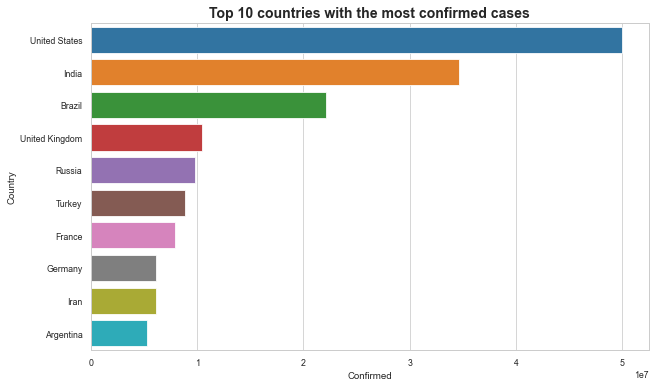

In [58]:
# plot the number of confirmed cases in the top 10 countries
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Confirmed', y = 'Country', data = df.sort_values(by = 'Confirmed', ascending = False).head(10))
plt.title('Top 10 countries with the most confirmed cases', fontweight = 'bold', fontsize = 14)
plt.show()


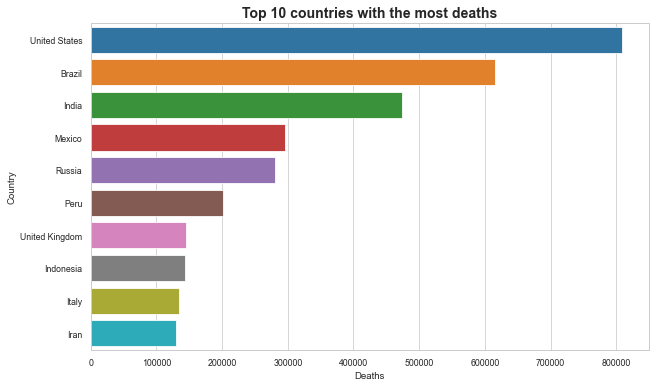

In [59]:
# plot the top ten countries with the most deaths
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Deaths', y = 'Country', data = df.sort_values(by = 'Deaths', ascending = False).head(10))
plt.title('Top 10 countries with the most deaths', fontweight = 'bold', fontsize = 14)
plt.show()